# **K-Nearest Neighbour Algorithm (KNN)- Classification**

The dataset of the company used in this project was downloaded from Kaggle and the columns were hidden by the company itself to maintain the confidentiality. 

We will use this data to create a model using KNN algorithm and predicts a class of a new data.

## **Steps involved:**

1. Importing Libraries
2. Getting the dataset
3. Standardization of variables
4. Train Test Split the data
5. Building the model
    1.   Select the nearest neighbors, for example k=5
    2.   Calculate the distance between the nearest neighbors
    3.   Find out how many neares neighbors belong to Category 1 & Category 2
    4.   If there is a maximum number of Category neighbors (3) found and can be considered the query point belongs to category 1
6. Predictions and Evaluations
7. Choosing the K value using Elbow method
8. Comparision of K=1 and K=23 results


**Importing Libraries**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Getting the dataset**

Setting index_col=0 to use the first column as the index

In [41]:
df = pd.read_csv('/content/drive/My Drive/MachineLearning/KNN/Classified Data', index_col=0)

In [42]:
df.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


**Standardize the variables**

These features may have different units, so it is mandatory to standardize the variables

In [43]:
from sklearn.preprocessing import StandardScaler # Importing StadardSclaler from sklearn.preprocessing

In [44]:
scaler = StandardScaler() # Creating the object called 'scaler'

In [45]:
scaler.fit(df.drop('TARGET CLASS', axis=1)) # TARGET CLASS feature is a dependent variable which has to be dropped while standardizing scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [47]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [48]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) # Creating dataframe from scaled_features and getting the columns from df dataframe
df_feat.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
5,-0.399853,1.591707,0.928649,1.477102,0.308440,0.263270,1.239716,0.722608,-2.206816,0.809900
6,-0.017189,0.534949,0.826189,-1.723636,-0.147547,-2.010505,-0.206348,-1.096313,-0.158215,-1.233974
7,-0.461182,-0.100835,0.210071,-1.909291,-0.366695,0.396875,0.718122,0.934523,0.228458,0.308929
8,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
9,-0.612806,-2.331876,0.197211,1.127356,1.636853,-0.225233,0.948308,-1.644881,1.309064,-1.865764


## **Train Test Split**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30) #Split arrays or matrices into random train and test subsets; 
# scaled features are independent features and TARGET CLASS feature is a dependent feature
# Test size 30%

## **KNN**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1) #Initially taking k=1 ; k-value will be selected by considering the Error Rate

In [53]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
pred = knn.predict(x_test)

## **Predictions and Evaluations**

**Evaluating our KNN model**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print (confusion_matrix(y_test, pred))

[[119  16]
 [ 15 150]]


In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       135
           1       0.90      0.91      0.91       165

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



### **Choosing a K Value - using Elbow method**

Pred_i value contains all the prediction values (like 1,0,1,0,0,1...) upon y_test(1,0,0,1,1,...) when K=1, pred_i !=y_test takes the value which is not predicted correctly(error) . No need to take correct predicted values. ex: out of 100 data points 60 not predicted correctly wrt y_test so these 60 data points we calculate mean. This will be continue for K=2,3.. upto 40. which ever having low mean value

In [58]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

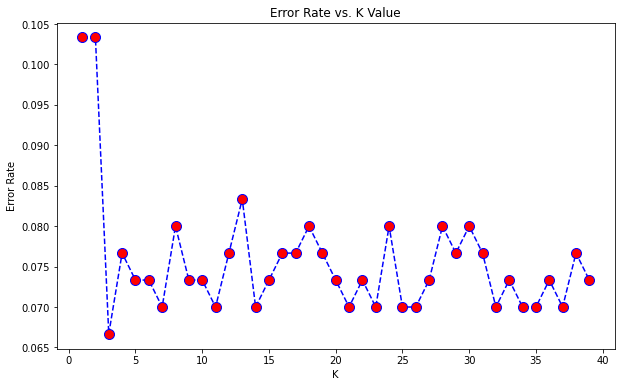

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that after K>23, the error rate just tends to hover 0.06-0.05. Let us retrain the model with K value = 23 and check the classification

**Quick comparison to our original k=1**

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[119  16]
 [ 15 150]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.88       135
           1       0.90      0.91      0.91       165

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



**Builind model with K=23**

In [66]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print ('With K=23')
print ('\n')
print (confusion_matrix(y_test, pred))
print ('\n')
print (classification_report(y_test, pred))

With K=23


[[126   9]
 [ 12 153]]


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.94      0.93      0.94       165

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## **Points to be noted:**
  1. KNN can be biased if the dataset is imbalanced
  2. KNN can be biased when the dataset has outliers